In [ ]:
try:  # Scipy >= 1.10
    from scipy.datasets import face
except ImportError:
    from scipy.misc import face

raccoon_face = face(gray=True)

print(f"The dimension of the image is {raccoon_face.shape}")
print(f"The data used to encode the image is of type {raccoon_face.dtype}")
print(f"The number of bytes taken in RAM is {raccoon_face.nbytes}")

The dimension of the image is (768, 1024)
The data used to encode the image is of type uint8
The number of bytes taken in RAM is 786432


### **Cálculo do uso total de memória da imagem**

768 pixels (altura) × 1024 pixels (largura) = 786.432 pixels

Considerando a informação que cada pixel equivale a 8bits, logo:

8 bits = 1 byte

Logo a imagem tem uso total de memória aproximadamente de 786 KB

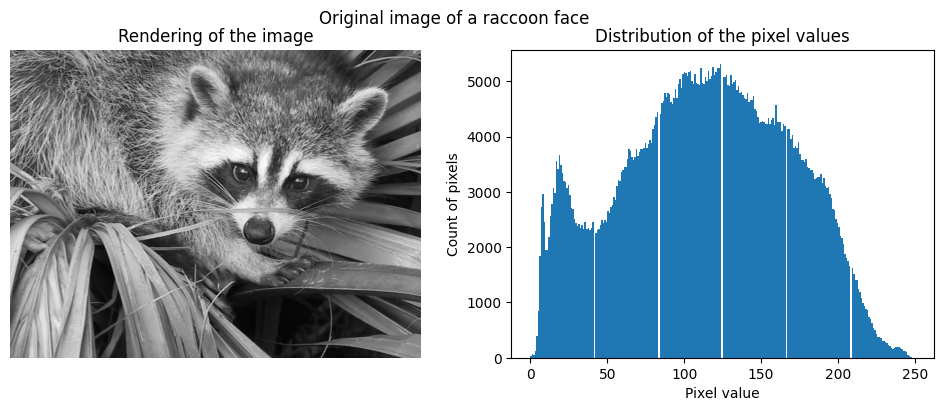

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))

ax[0].imshow(raccoon_face, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")
ax[1].hist(raccoon_face.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Original image of a raccoon face")

### Utilizando a estratégia "uniform" para representar de 256 para 8 valores de cinza a imagem. Nota-se pela distribuição anterior que essa provavelmente nao é a melhor forma de representar a imagem, já que os tons de cinza vão ser espaçados igualmente.

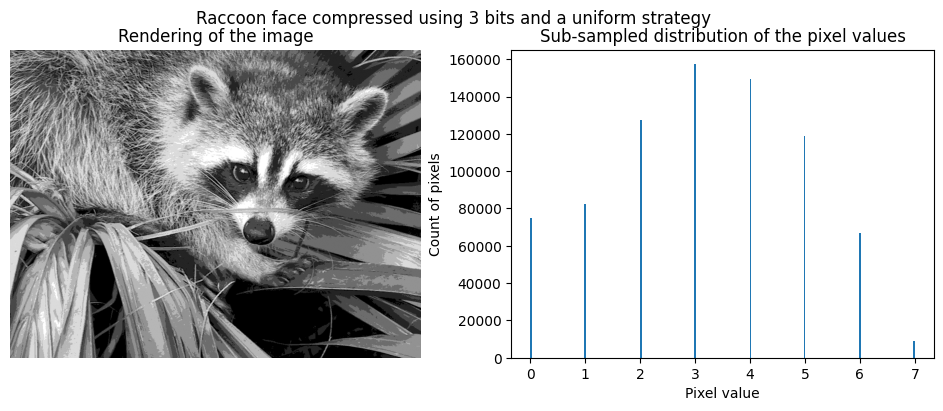

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

n_bins = 8
encoder = KBinsDiscretizer(
    n_bins=n_bins,
    encode="ordinal",
    strategy="uniform",
    random_state=0,
)
compressed_raccoon_uniform = encoder.fit_transform(raccoon_face.reshape(-1, 1)).reshape(
    raccoon_face.shape
)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(compressed_raccoon_uniform, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")
ax[1].hist(compressed_raccoon_uniform.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Count of pixels")
ax[1].set_title("Sub-sampled distribution of the pixel values")
_ = fig.suptitle("Raccoon face compressed using 3 bits and a uniform strategy")

obs: Enquanto a imagem comprimida usa os rótulos inteiros (0 a 7) para economizar memória, o bin_center guarda os valores flutuantes para que você possa, se quisesse, reconstruir a imagem com cores que são uma representação mais fiel da média de cada intervalo original.

In [ ]:
bin_edges = encoder.bin_edges_[0]
bin_center = bin_edges[:-1] + (bin_edges[1:] - bin_edges[:-1]) / 2
bin_center

array([ 15.625,  46.875,  78.125, 109.375, 140.625, 171.875, 203.125,
       234.375])

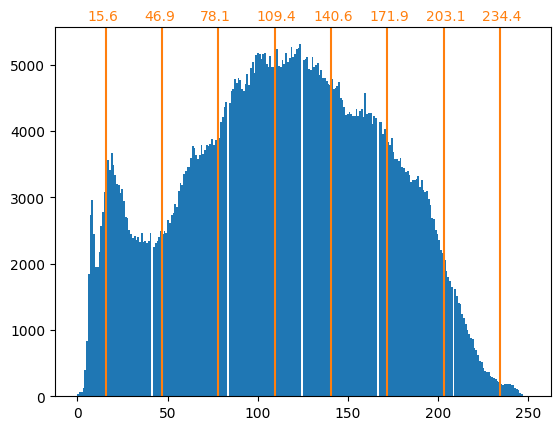

In [ ]:
_, ax = plt.subplots()
ax.hist(raccoon_face.ravel(), bins=256)
color = "tab:orange"
for center in bin_center:
    ax.axvline(center, color=color)
    ax.text(center - 10, ax.get_ybound()[1] + 100, f"{center:.1f}", color=color)

### Utilizando k-means para encontrar um mapeamento de cores mais otimizado pensando no exemplo acima. Já que, as representaçoes de forma uniforme deixam valores com um grande número de informação e outros valores com baixo número de informação.

obs: para forçar a saída como um array de int -> .astype(np.uint8)

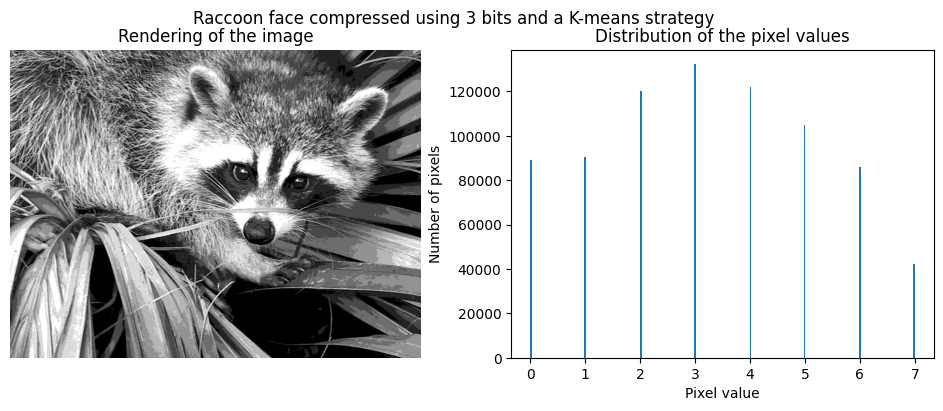

In [ ]:
import numpy as np

encoder = KBinsDiscretizer(
    n_bins=n_bins,
    encode="ordinal",
    strategy="kmeans",
    random_state=0,
)
compressed_raccoon_kmeans = encoder.fit_transform(raccoon_face.reshape(-1, 1)).reshape(
    raccoon_face.shape
)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(compressed_raccoon_kmeans, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")
ax[1].hist(compressed_raccoon_kmeans.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Number of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Raccoon face compressed using 3 bits and a K-means strategy")

In [ ]:
bin_edges = encoder.bin_edges_[0]
bin_center = bin_edges[:-1] + (bin_edges[1:] - bin_edges[:-1]) / 2
bin_center

array([ 18.90885631,  53.34346583,  82.64447187, 109.28225276,
       134.70763101, 159.78681467, 185.17226834, 224.02069427])

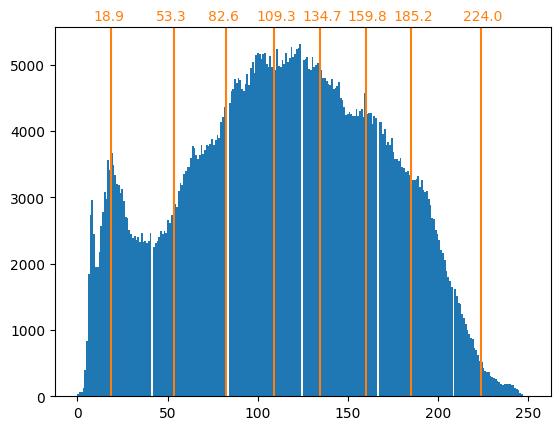

In [ ]:
_, ax = plt.subplots()
ax.hist(raccoon_face.ravel(), bins=256)
color = "tab:orange"
for center in bin_center:
    ax.axvline(center, color=color)
    ax.text(center - 10, ax.get_ybound()[1] + 100, f"{center:.1f}", color=color)

### Com a estratégia "kmeans" no encoder, as novas cores geradas não são espaçadas de forma uniforme, ela analisou a distribuição de cores da imagem e colocou as novas cores representantes exatamente nos "centros de gravidade" dos grupos de pixels mais populosos, garantindo uma compressão muito mais fiel e de maior qualidade visual.

In [ ]:
print(f"The number of bytes taken in RAM is {compressed_raccoon_kmeans.nbytes}")
print(f"Compression ratio: {compressed_raccoon_kmeans.nbytes / raccoon_face.nbytes}")

The number of bytes taken in RAM is 6291456
Compression ratio: 8.0


In [ ]:
print(f"Type of the compressed image: {compressed_raccoon_kmeans.dtype}")

Type of the compressed image: float64


## Transformando para "uint8"

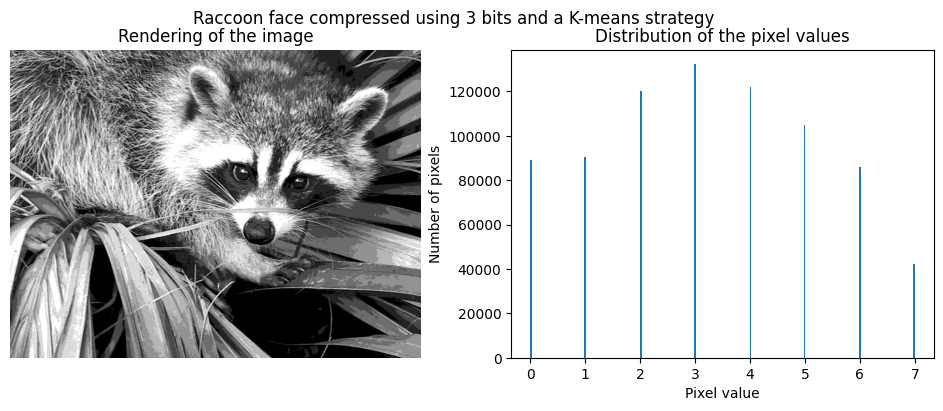

In [ ]:
encoder = KBinsDiscretizer(
    n_bins=n_bins,
    encode="ordinal",
    strategy="kmeans",
    random_state=0,
)
compressed_raccoon_kmeans = encoder.fit_transform(raccoon_face.reshape(-1, 1)).reshape(
    raccoon_face.shape
).astype(np.uint8)

fig, ax = plt.subplots(ncols=2, figsize=(12, 4))
ax[0].imshow(compressed_raccoon_kmeans, cmap=plt.cm.gray)
ax[0].axis("off")
ax[0].set_title("Rendering of the image")
ax[1].hist(compressed_raccoon_kmeans.ravel(), bins=256)
ax[1].set_xlabel("Pixel value")
ax[1].set_ylabel("Number of pixels")
ax[1].set_title("Distribution of the pixel values")
_ = fig.suptitle("Raccoon face compressed using 3 bits and a K-means strategy")

In [ ]:
print(f"The number of bytes taken in RAM is {compressed_raccoon_kmeans.nbytes}")
print(f"Compression ratio: {compressed_raccoon_kmeans.nbytes / raccoon_face.nbytes}")

The number of bytes taken in RAM is 786432
Compression ratio: 1.0


O motivo pelo qual o número de bytes não diminuiu na memória RAM está no "contêiner" de dados que usamos.

Para armazenar 8 valores diferentes (0 a 7), nós precisamos, teoricamente, de apenas 3 bits por pixel (porque 2³ = 8).

Para armazenar os 256 valores originais, precisávamos de 8 bits por pixel (porque 2⁸ = 256).

O problema é que os computadores e o NumPy não trabalham com "inteiros de 3 bits". O menor "contêiner" padrão e prático para armazenar um número inteiro é o inteiro de 8 bits (uint8)